In [34]:
%matplotlib inline

# Imports
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
#import seaborn as sns
import sklearn
import numpy as np

In [35]:
# Import data
co2_df = pd.read_csv('input/global_co2.csv')
temp_df = pd.read_csv('input/annual_temp.csv')
print(co2_df.head())
print(temp_df.head())
#print(co2_df.columns=['Year','CO2'])

   Year  Total  Gas Fuel  Liquid Fuel  Solid Fuel  Cement  Gas Flaring  \
0  1751      3         0            0           3       0            0   
1  1752      3         0            0           3       0            0   
2  1753      3         0            0           3       0            0   
3  1754      3         0            0           3       0            0   
4  1755      3         0            0           3       0            0   

   Per Capita  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
    Source  Year    Mean
0     GCAG  2015  0.8990
1  GISTEMP  2015  0.8700
2     GCAG  2014  0.7402
3  GISTEMP  2014  0.7500
4     GCAG  2013  0.6687


In [36]:
# Clean data
co2_df = co2_df.ix[:,:2]                     # Keep only total CO2
co2_df = co2_df.ix[co2_df['Year'] >= 1960]   # Keep only 1960 - 2010
co2_df.columns=['Year','CO2']                # Rename columns
co2_df = co2_df.reset_index(drop=True)                # Reset index
print(co2_df.tail())


    Year   CO2
46  2006  8370
47  2007  8566
48  2008  8783
49  2009  8740
50  2010  9167


In [37]:
temp_df =temp_df[temp_df.Source != 'GISTEMP'] # Keep only one source 
temp_df.drop('Source', inplace = True, axis = 1) #Drop name of source
temp_df = temp_df.reindex(index=temp_df.index[::-1]) #Reset Index


   Year    Mean
8  2011  0.5759
6  2012  0.6219
4  2013  0.6687
2  2014  0.7402
0  2015  0.8990


In [50]:
temp_df = temp_df.ix[temp_df['Year'] >= 1960]   # Keep only 1960 - 2010
temp_df.columns=['Year', 'Temperature']# Rename columns
temp_df = temp_df.reset_index(drop=True)     
print(temp_df.tail())

    Year  Temperature
51  2011       0.5759
52  2012       0.6219
53  2013       0.6687
54  2014       0.7402
55  2015       0.8990


In [51]:
# Concatenate
climate_change_df = pd.concat([co2_df, temp_df.Temperature], axis=1)
print(climate_change_df.head())

     Year     CO2  Temperature
0  1960.0  2569.0       0.0252
1  1961.0  2580.0       0.0818
2  1962.0  2686.0       0.0924
3  1963.0  2833.0       0.1100
4  1964.0  2995.0      -0.1461


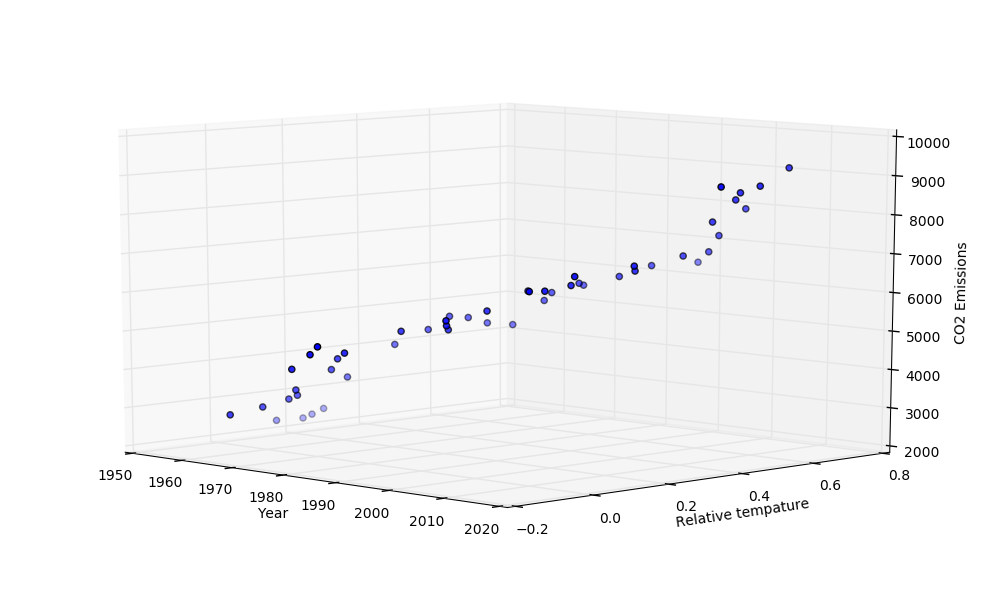

In [58]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(12.5,7.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(climate_change_df['Year'], climate_change_df['Temperature'] , climate_change_df['CO2'])
ax.set_ylabel('Relative tempature'); ax.set_xlabel('Year'); ax.set_zlabel('CO2 Emissions')
ax.view_init(10, -45)